<a href="https://colab.research.google.com/github/vishnu-nitc/NLP-Chatbot/blob/main/Group_3_NLP_Chatbot_12_01_23%20potential%20acc%20levl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Transformers
!pip install transformers==3 --quiet
# To get model summary
!pip install torchinfo --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.6/754.6 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 62.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
#import libraries 
import numpy as np
import pandas as pd
import re 
import nltk 
import keras
import tensorflow as tf
from tensorflow import keras

import random
import json
import pickle
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from keras.layers import BatchNormalization, Flatten, Dropout, BatchNormalization


import torch
import torch.nn as nn
import transformers

nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
!wget https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/archive/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv --quiet

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#df=pd.read_csv('/content/drive/My Drive/AIML/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
df = pd.read_csv('/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [7]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [8]:
#check if any column have missing value
def missing_val_cnt(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

In [9]:
# Missing values
missing_val_cnt(df)

There is no missing value found.


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
#Dropping the first column 'Unnamed'
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [12]:
#Rename column with meaningful label
df.rename(columns = {'Data':'Date & Timestamp'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


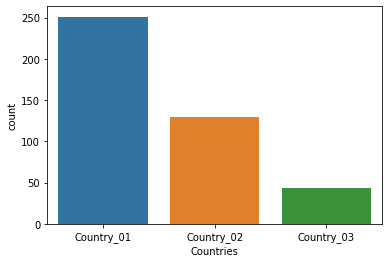

In [13]:
#EDA- Visualisation and preprocessing of each variable
sns.countplot(df['Countries']);

In [14]:
df['Countries'].replace(['Country_01', 'Country_02', 'Country_03'],[1,2,3], inplace=True)
df['Countries']=df['Countries'].astype(int)

In [15]:
df['Local']=df['Local'].str[6:]
df['Local']=df['Local'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


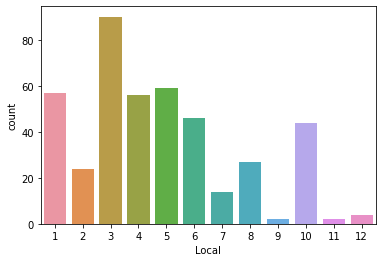

In [16]:
sns.countplot(df['Local']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


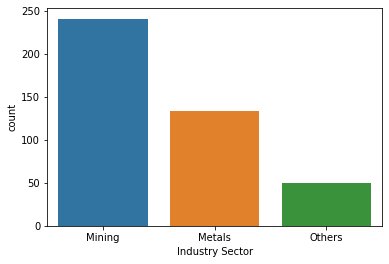

In [17]:
sns.countplot(df['Industry Sector']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


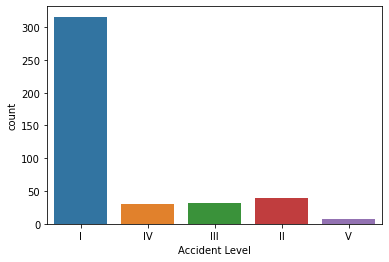

In [18]:
sns.countplot(df['Accident Level']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


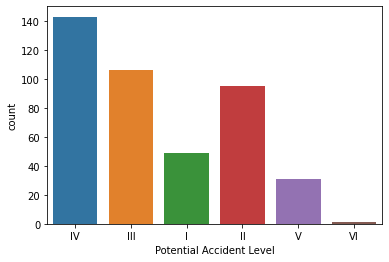

In [19]:
sns.countplot(df['Potential Accident Level']);

In [20]:
df['Accident Level']=df['Accident Level'].replace(['I','II','III','IV','V'],[1,2,3,4,5])
df['Accident Level']=df['Accident Level'].astype(int)

In [21]:
df['Potential Accident Level']=df['Potential Accident Level'].replace(['I','II','III','IV','V','VI'],[1,2,3,4,5,6])
df['Potential Accident Level']=df['Potential Accident Level'].astype(int)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


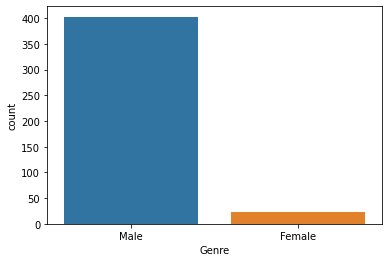

In [22]:
sns.countplot(df['Genre']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


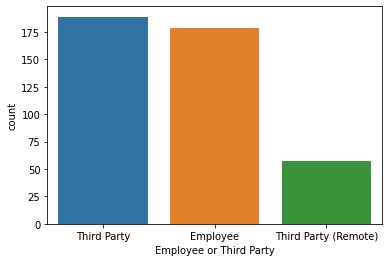

In [23]:
sns.countplot(df['Employee or Third Party']);

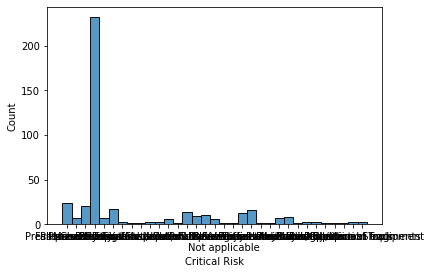

In [24]:
sns.histplot(df['Critical Risk']);

In [25]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

In [26]:
df['Critical Risk'].nunique()

33

In [27]:
df['Date'] = pd.to_datetime(df['Date & Timestamp'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['WeekofYear'] = df.Date.apply(lambda x : x.weekofyear)

In [28]:
#Defining seasons for months in Brazil
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [29]:
df['Season'] = df['Month'].apply(month2seasons)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


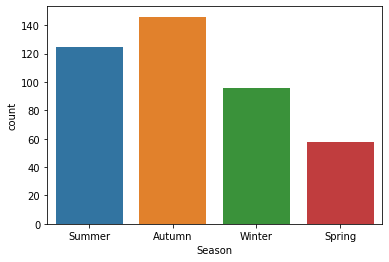

In [30]:
sns.countplot(df['Season']);

In [31]:
le=LabelEncoder()
df['Season']=le.fit_transform(df['Season'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


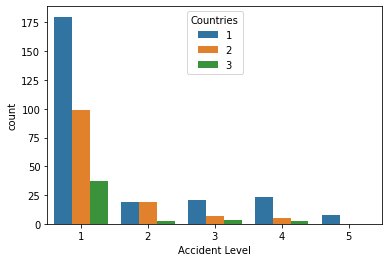

In [32]:
#Bivariate analysis
sns.countplot(df['Accident Level'],hue=df['Countries']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


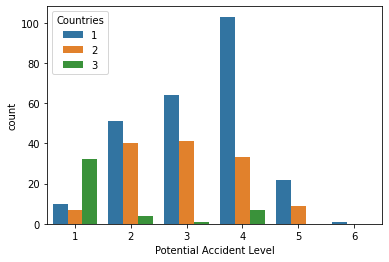

In [33]:
sns.countplot(df['Potential Accident Level'],hue=df['Countries']);


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


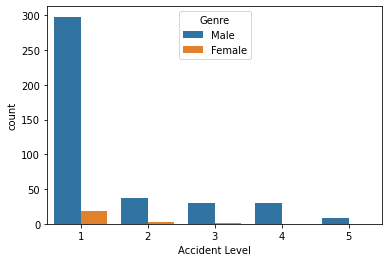

In [34]:
sns.countplot(df['Accident Level'],hue=df['Genre']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


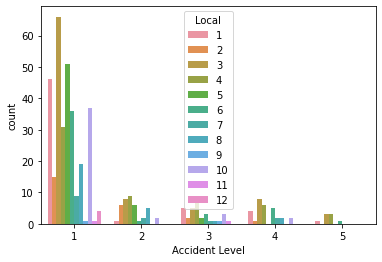

In [35]:
sns.countplot(df['Accident Level'],hue=df['Local']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


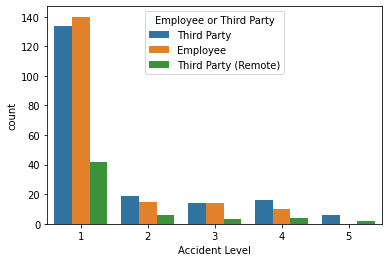

In [36]:
sns.countplot(df['Accident Level'],hue=df['Employee or Third Party']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


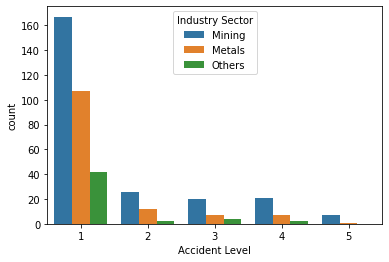

In [37]:
sns.countplot(df['Accident Level'],hue=df['Industry Sector']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


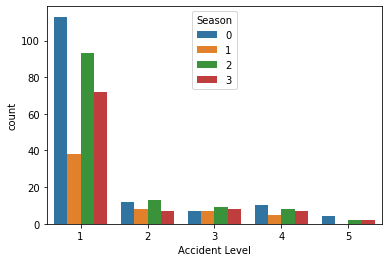

In [38]:
sns.countplot(df['Accident Level'],hue=df['Season']);

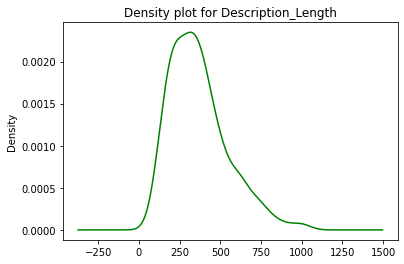

In [39]:
#Analysing Description variable
df['Description_Length']=df['Description'].str.len()
df.Description_Length.plot.density(color='green')
plt.title('Density plot for Description_Length')
plt.show()

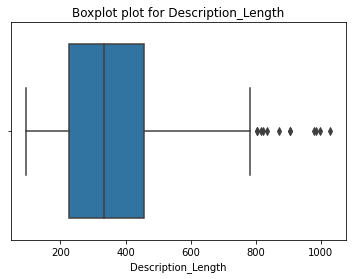

In [40]:
sns.boxplot(x=df["Description_Length"])
plt.title('Boxplot plot for Description_Length')
plt.show()

In [41]:
print('Average length of Description : ',df.Description.str.len().mean())
print('Maximum length of Description : ',df.Description.str.len().max())
print('Minimum length of Description : ',df.Description.str.len().min())

Average length of Description :  368.28
Maximum length of Description :  1029
Minimum length of Description :  94


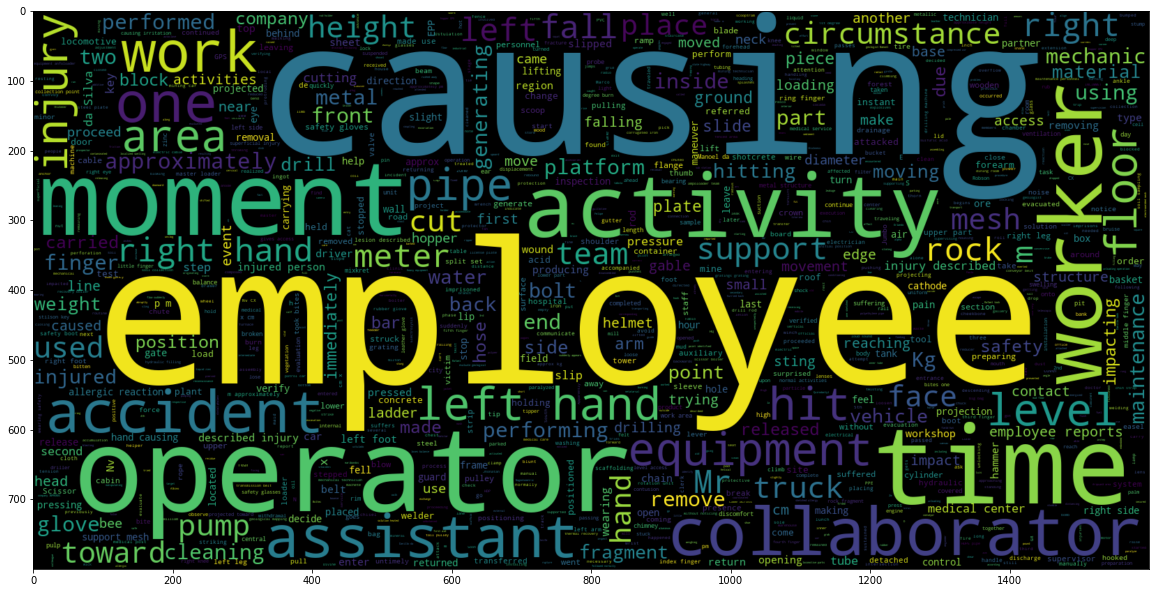

In [42]:
#plotting the most frequent words with wordcloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Description'].values))
plt.imshow(wc , interpolation = 'bilinear')

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(df['Description']))
len(tokenizer.word_counts)

3453

only 3453 words . including stop words


In [44]:
#Analysing the frequent words
word_count_array = tokenizer.word_counts
word=[]
counts=[]
for key,val in word_count_array.items():
  word.append(key)
  counts.append(val)
df_cnt=pd.DataFrame(list(zip(word,counts)),columns=['word','count'])
df_cnt.nlargest(40,['count'])

,word,count
2,the,4355
5,of,1517
12,to,672
32,and,612
57,in,556
47,a,532
52,was,439
35,at,350
25,on,307
132,that,294


In [45]:
#Preprocessing with NLP
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("</?.*?>"," <> ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma


def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [46]:
df['normalized_Description'] = df['Description'].apply(normalize_text)

In [47]:
#Encoding other categorical variables
df['Employee or Third Party']=le.fit_transform(df['Employee or Third Party'])
df['Critical Risk']=le.fit_transform(df['Critical Risk'])
df['Genre']=le.fit_transform(df['Genre'])
df['Industry Sector']=le.fit_transform(df['Industry Sector'])

In [48]:
!wget http://nlp.stanford.edu/data/glove.6B.zip --quiet

In [49]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [50]:
#Creating glove embeddings
embeddings_index = {}
EMBEDDING_FILE = '/content/glove.6B.300d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:19, 20008.34it/s]

Found 400000 word vectors.


In [51]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [52]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
ind_glove_df=pd.DataFrame()
ind_glove_df = [sent2vec(x) for x in tqdm(df['normalized_Description'])]

100%|██████████| 425/425 [00:00<00:00, 3472.02it/s]


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True)
    vec_tfidf.fit(df['normalized_Description'])
    X = vec_tfidf.transform(df['normalized_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0
3,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0,...,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0
4,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0,...,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0


In [54]:
df = df.join(pd.DataFrame(ind_tfidf_df).iloc[:,0:30].reset_index(drop=True))

In [55]:
df.columns

Index(['Date & Timestamp', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description', 'Date',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'Season',
       'Description_Length', 'normalized_Description', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time', 'TFIDF_activity', 'TFIDF_causing', 'TFIDF_employee',
       'TFIDF_hand', 'TFIDF_injury', 'TFIDF_left', 'TFIDF_moment',
       'TFIDF_operator', 'TFIDF_right', 'TFIDF_time', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time'],
      dtype='object')

In [56]:
X=df.drop(['Date & Timestamp','Accident Level','Accident Level','Description','normalized_Description','Date','Year','Month','Day','WeekofYear','Weekday','Description_Length'],axis=1)
Y=np.array(df['Potential Accident Level'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 340
Validation utterances: 85


In [57]:
X.head(3)

,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Season,TFIDF_activity,TFIDF_causing,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,1,1,1,4,1,1,20,2,0.0,0.000000,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.0,0.0
1,2,2,1,4,1,0,21,2,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,1,3,1,3,1,2,15,2,0.0,0.469521,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.0,0.0


In [58]:
scores=pd.DataFrame(columns={'Model','Accuracy','Recall','Precision','F1-score'})
def display_score(y_test,y_pred,modelname):
  acc=accuracy_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred,average='weighted')
  precision=precision_score(y_test,y_pred,average='weighted')
  f1=f1_score(y_test, y_pred, average='weighted')
  print('Model : ',modelname)
  print('F1 score: Macro', f1)
  print('Accuracy score on test data : ' ,acc)
  print('Recall score on test data : ', recall)
  print('Precision score on test data : ', precision)
  dict1={'Model':modelname,'Accuracy':acc,'Recall':recall,'Precision':precision,'F1-score':f1}
  return dict1

In [59]:
#Building basic models
model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
predrf = model_rf.predict(X_test)
scores=scores.append(display_score(y_test,predrf,'Random Forest'),ignore_index=True)

Model :  Random Forest
F1 score: Macro 0.9365325077399381
Accuracy score on test data :  0.9411764705882353
Recall score on test data :  0.9411764705882353
Precision score on test data :  0.9366844919786097


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
preddt = model_dt.predict(X_test)
scores=scores.append(display_score(y_test,preddt,'Decision Tree'),ignore_index=True)

Model :  Decision Tree
F1 score: Macro 0.9843137254901961
Accuracy score on test data :  0.9882352941176471
Recall score on test data :  0.9882352941176471
Precision score on test data :  0.9823529411764705


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
preddt

array([3, 3, 4, 2, 3, 2, 4, 2, 2, 4, 2, 2, 3, 2, 3, 3, 4, 4, 3, 2, 2, 1,
       2, 4, 3, 3, 4, 3, 4, 5, 4, 3, 3, 2, 3, 1, 4, 1, 4, 4, 2, 3, 4, 4,
       1, 2, 4, 3, 3, 2, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 1, 4, 1, 3, 4, 5,
       2, 1, 4, 4, 2, 4, 3, 4, 4, 4, 3, 4, 1, 4, 4, 2, 3, 2, 1])

In [63]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predknn=knn_clf.predict(X_test)
scores=scores.append(display_score(y_test,predknn,'KNN model'),ignore_index=True)

Model :  KNN model
F1 score: Macro 0.6440865939135835
Accuracy score on test data :  0.6470588235294118
Recall score on test data :  0.6470588235294118
Precision score on test data :  0.6476074128711046


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best leaf_size: 1
Best p: 1
Best n_neighbors: 11


In [65]:
knn_3 = KNeighborsClassifier(leaf_size=best_model.best_estimator_.get_params()['leaf_size'],n_neighbors=best_model.best_estimator_.get_params()['n_neighbors'],p=best_model.best_estimator_.get_params()['p'])
knn_3.fit(X_train,y_train)
knn3pred=knn_3.predict(X_test)
scores=scores.append(display_score(y_test,knn3pred,'KNN Gridsearch'),ignore_index=True)

Model :  KNN Gridsearch
F1 score: Macro 0.6717550305146213
Accuracy score on test data :  0.6705882352941176
Recall score on test data :  0.6705882352941176
Precision score on test data :  0.6857647058823529


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

Hyperparameter tuning on ML models

In [67]:
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
tree_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.8329411764705883


In [68]:
tree_2 = DecisionTreeClassifier(criterion=tree_cv.best_estimator_.get_params()['criterion'],max_depth=tree_cv.best_estimator_.get_params()['max_depth'],max_features=tree_cv.best_estimator_.get_params()['max_features'],min_samples_leaf=tree_cv.best_estimator_.get_params()['min_samples_leaf'])
tree_2.fit(X_train,y_train)
tree2pred=tree_2.predict(X_test)
scores=scores.append(display_score(y_test,tree2pred,'DT Gridsearch'),ignore_index=True)

Model :  DT Gridsearch
F1 score: Macro 0.9133146591970122
Accuracy score on test data :  0.9176470588235294
Recall score on test data :  0.9176470588235294
Precision score on test data :  0.9197231833910035


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Creating the hyperparameter grid for logistic regression
c_space = np.logspace(-5, 8, 15)
param_gridlr = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=10000)
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_gridlr, cv = 5)
 
logreg_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 0.9882352941176471


In [70]:
logreg = LogisticRegression(max_iter=10000,C=logreg_cv.best_estimator_.get_params()['C'])
logreg.fit(X_train,y_train)
logregpred=logreg.predict(X_test)
scores=scores.append(display_score(y_test,logregpred,'LR Gridsearch'),ignore_index=True)

Model :  LR Gridsearch
F1 score: Macro 0.9843137254901961
Accuracy score on test data :  0.9882352941176471
Recall score on test data :  0.9882352941176471
Precision score on test data :  0.9823529411764705


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Grid Search with Random Forest
param_gridrf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [72]:
grid_searchrf = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_gridrf)
grid_searchrf.fit(X_train, y_train)
print(grid_searchrf.best_estimator_)
print("Best score is {}".format(grid_searchrf.best_score_))

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
                       n_estimators=25)
Best score is 1.0


In [73]:
rf1=RandomForestClassifier(max_depth=grid_searchrf.best_estimator_.get_params()['max_depth'], max_features=grid_searchrf.best_estimator_.get_params()['max_features'], max_leaf_nodes=grid_searchrf.best_estimator_.get_params()['max_leaf_nodes'],
                       n_estimators=grid_searchrf.best_estimator_.get_params()['n_estimators'])
rf1.fit(X_train,y_train)
rfgrid=rf1.predict(X_test)
scores=scores.append(display_score(y_test,rfgrid,'RF Gridsearch'),ignore_index=True)

Model :  RF Gridsearch
F1 score: Macro 0.9843137254901961
Accuracy score on test data :  0.9882352941176471
Recall score on test data :  0.9882352941176471
Precision score on test data :  0.9823529411764705


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#Synthetic Minority Over Sampling Technique
sm = SMOTE(random_state=10)   
X_train=np.array(X_train)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [75]:
#Using KNN model for upsampled data
knn_clf.fit(X_train_res, y_train_res)
predknn=knn_clf.predict(X_test)
scores=scores.append(display_score(y_test,predknn,'KNN with SMOTE'),ignore_index=True)

Model :  KNN with SMOTE
F1 score: Macro 0.5881266968325792
Accuracy score on test data :  0.5764705882352941
Recall score on test data :  0.5764705882352941
Precision score on test data :  0.620385932150638


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df['normalized_Description'].values)
X = tokenizer.texts_to_sequences(df['normalized_Description'].values)
X = pad_sequences(X,maxlen=150)

In [77]:
len(X[0])

150

In [87]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df['Potential Accident Level']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(340, 150) (340, 6)
(85, 150) (85, 6)


In [88]:
Y

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [89]:
#Building NN model

model_nn = Sequential()
# Input - Layer
embed_dim = 128
model_nn.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model_nn.add(Flatten())
# Hidden - Layers
model_nn.add(Dropout(0.5))
model_nn.add(Dense(128, activation = "relu",))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(64, activation = "relu"))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(32, activation = "relu"))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(16, activation = "relu"))
# Output- Layer
model_nn.add(Dense(6, activation = "softmax"))
print(model_nn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 128)          256000    
                                                                 
 flatten_2 (Flatten)         (None, 19200)             0         
                                                                 
 dropout_8 (Dropout)         (None, 19200)             0         
                                                                 
 dense_11 (Dense)            (None, 128)               2457728   
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)               

In [90]:
model_nn.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
batch_size = 128
model_nn.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
3/3 - 1s - loss: 1.7560 - accuracy: 0.2529 - 684ms/epoch - 228ms/step
Epoch 2/10
3/3 - 0s - loss: 1.7978 - accuracy: 0.2912 - 194ms/epoch - 65ms/step
Epoch 3/10
3/3 - 0s - loss: 1.7854 - accuracy: 0.2588 - 170ms/epoch - 57ms/step
Epoch 4/10
3/3 - 0s - loss: 1.7354 - accuracy: 0.2735 - 169ms/epoch - 56ms/step
Epoch 5/10
3/3 - 0s - loss: 1.6858 - accuracy: 0.2971 - 162ms/epoch - 54ms/step
Epoch 6/10
3/3 - 0s - loss: 1.6776 - accuracy: 0.2882 - 156ms/epoch - 52ms/step
Epoch 7/10
3/3 - 0s - loss: 1.6941 - accuracy: 0.2765 - 167ms/epoch - 56ms/step
Epoch 8/10
3/3 - 0s - loss: 1.6788 - accuracy: 0.2618 - 160ms/epoch - 53ms/step
Epoch 9/10
3/3 - 0s - loss: 1.6717 - accuracy: 0.2912 - 161ms/epoch - 54ms/step
Epoch 10/10
3/3 - 0s - loss: 1.6607 - accuracy: 0.2706 - 159ms/epoch - 53ms/step


In [91]:
Yprednn=model_nn.predict(X_test)
Yprednn=Yprednn.round(decimals=0)
scores=scores.append(display_score(Y_test,Yprednn,'NN model'),ignore_index=True)

3/3 [==============================] - 0s 6ms/step
Model :  NN model
F1 score: Macro 0.0
Accuracy score on test data :  0.0
Recall score on test data :  0.0
Precision score on test data :  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [92]:
#Building LSTM model
embed_dim = 128
lstm_out = 196

model_lstm = Sequential()
model_lstm.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model_lstm.add(Dense(6,activation='softmax'))
model_lstm.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_lstm.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 128)          256000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 150, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 392)              509600    
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 6)                 2358      
                                                                 
Total params: 767,958
Trainable params: 767,958
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
batch_size = 128
model_lstm.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
3/3 - 12s - loss: 1.7615 - accuracy: 0.2706 - 12s/epoch - 4s/step
Epoch 2/10
3/3 - 8s - loss: 1.6306 - accuracy: 0.3529 - 8s/epoch - 3s/step
Epoch 3/10
3/3 - 7s - loss: 1.5568 - accuracy: 0.3441 - 7s/epoch - 2s/step
Epoch 4/10
3/3 - 10s - loss: 1.4983 - accuracy: 0.3441 - 10s/epoch - 3s/step
Epoch 5/10
3/3 - 7s - loss: 1.4808 - accuracy: 0.3647 - 7s/epoch - 2s/step
Epoch 6/10
3/3 - 8s - loss: 1.4590 - accuracy: 0.3412 - 8s/epoch - 3s/step
Epoch 7/10
3/3 - 7s - loss: 1.4338 - accuracy: 0.3559 - 7s/epoch - 2s/step
Epoch 8/10
3/3 - 7s - loss: 1.3925 - accuracy: 0.4118 - 7s/epoch - 2s/step
Epoch 9/10
3/3 - 7s - loss: 1.3643 - accuracy: 0.4118 - 7s/epoch - 2s/step
Epoch 10/10
3/3 - 7s - loss: 1.2987 - accuracy: 0.4676 - 7s/epoch - 2s/step


In [94]:
Ypred=model_lstm.predict(X_test)

3/3 [==============================] - 1s 121ms/step


In [95]:
Ypred=model_lstm.predict(X_test)
Ypred=Ypred.round(decimals=0)
scores=scores.append(display_score(Y_test,Ypred,'LSTM'),ignore_index=True)

3/3 [==============================] - 0s 125ms/step
Model :  LSTM
F1 score: Macro 0.05243697478991598
Accuracy score on test data :  0.03529411764705882
Recall score on test data :  0.03529411764705882
Precision score on test data :  0.10196078431372549


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [96]:
#Adding more layers to LSTM model
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model_lstm1.add(SpatialDropout1D(0.4))
model_lstm1.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model_lstm1.add(Dense(64,activation='relu'))
model_lstm1.add(Dense(32,activation='relu'))
model_lstm1.add(Dense(6,activation='softmax'))
model_lstm1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_lstm1.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 128)          256000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 150, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 392)              509600    
 nal)                                                            
                                                                 
 dense_17 (Dense)            (None, 64)                25152     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 6)                

In [97]:
batch_size = 128
model_lstm1.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
3/3 - 12s - loss: 1.7737 - accuracy: 0.3088 - 12s/epoch - 4s/step
Epoch 2/10
3/3 - 7s - loss: 1.6741 - accuracy: 0.3441 - 7s/epoch - 2s/step
Epoch 3/10
3/3 - 8s - loss: 1.6081 - accuracy: 0.3441 - 8s/epoch - 3s/step
Epoch 4/10
3/3 - 7s - loss: 1.5295 - accuracy: 0.3441 - 7s/epoch - 2s/step
Epoch 5/10
3/3 - 7s - loss: 1.5517 - accuracy: 0.3441 - 7s/epoch - 2s/step
Epoch 6/10
3/3 - 8s - loss: 1.5205 - accuracy: 0.3441 - 8s/epoch - 3s/step
Epoch 7/10
3/3 - 7s - loss: 1.4945 - accuracy: 0.3441 - 7s/epoch - 2s/step
Epoch 8/10
3/3 - 7s - loss: 1.4827 - accuracy: 0.3441 - 7s/epoch - 2s/step
Epoch 9/10
3/3 - 7s - loss: 1.4530 - accuracy: 0.3588 - 7s/epoch - 2s/step
Epoch 10/10
3/3 - 7s - loss: 1.4041 - accuracy: 0.4471 - 7s/epoch - 2s/step


In [98]:
Ypredlstm=model_lstm1.predict(X_test)
Ypredlstm=Ypredlstm.round(decimals=0)
scores=scores.append(display_score(Y_test,Ypredlstm,'LSTM updated'),ignore_index=True)

3/3 [==============================] - 1s 118ms/step
Model :  LSTM updated
F1 score: Macro 0.0784313725490196
Accuracy score on test data :  0.058823529411764705
Recall score on test data :  0.058823529411764705
Precision score on test data :  0.11764705882352941


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


RNN

In [99]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [100]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    return model

In [101]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [102]:
demo_model = create_RNN(2, 1, (95,1), activation=['linear', 'linear'])

In [103]:
history = demo_model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2,validation_data=(X_test, Y_test),shuffle = True)

Epoch 1/50


ValueError: ignored

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
Ypredrnn=demo_model.predict(X_test)

In [ ]:
Ypredrnn=Ypredrnn.round(decimals=0)
scores=scores.append(display_score(y_test,Ypredrnn,'RNN'),ignore_index=True)

In [104]:
scores=scores[['Model','Accuracy','Recall','Precision','F1-score']]
print(scores)

             Model  Accuracy    Recall  Precision  F1-score
0    Random Forest  0.941176  0.941176   0.936684  0.936533
1    Decision Tree  0.988235  0.988235   0.982353  0.984314
2        KNN model  0.647059  0.647059   0.647607  0.644087
3   KNN Gridsearch  0.670588  0.670588   0.685765  0.671755
4    DT Gridsearch  0.917647  0.917647   0.919723  0.913315
5    LR Gridsearch  0.988235  0.988235   0.982353  0.984314
6    RF Gridsearch  0.988235  0.988235   0.982353  0.984314
7   KNN with SMOTE  0.576471  0.576471   0.620386  0.588127
8         NN model  0.000000  0.000000   0.000000  0.000000
9         NN model  0.000000  0.000000   0.000000  0.000000
10            LSTM  0.035294  0.035294   0.101961  0.052437
11    LSTM updated  0.058824  0.058824   0.117647  0.078431


In [ ]:
df = pd.read_csv('/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['Accident Level'])
# check class distribution
df['label'].value_counts(normalize = True)

0    0.743529
1    0.094118
2    0.072941
3    0.070588
4    0.018824
Name: label, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df[['Description', 'label', 'data_type','Accident Level']].groupby(['Accident Level', 'label', 'data_type']).count()

Description
Accident Level label data_type             
I              0     train              253
                     val                 63
II             1     train               32
                     val                  8
III            2     train               25
                     val                  6
IV             3     train               24
                     val                  6
V              4     train                6
                     val                  2

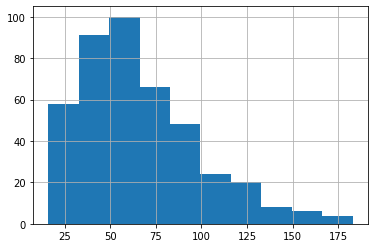

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in df.Description]
pd.Series(seq_len).hist(bins = 10)

In [ ]:
# Based on the histogram we are selecting the max len as 8
max_seq_len = 150

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].Description.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_seq_len, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].Description.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=max_seq_len, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=5,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 10

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:

from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 20

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
label_dict={'I':0,	
'II':1,
'III':2,
'IV':3,
'V':4}

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import os 
#os.mkdir("data_volume")

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        model=model.to(device)
        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
    #torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_model{epoch}.pth')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.0752649517620312
Validation loss: 0.88524419731564
F1 Score (Weighted): 0.6310015898251192


Epoch 2:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.91727414727211
Validation loss: 0.8731255167060428
F1 Score (Weighted): 0.6310015898251192


Epoch 3:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.8659700128962012
Validation loss: 0.8622569772932265
F1 Score (Weighted): 0.6310015898251192


Epoch 4:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.8311322857351864
Validation loss: 0.8536626663472917
F1 Score (Weighted): 0.6310015898251192


Epoch 5:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.754594669184264
Validation loss: 0.8578749001026154
F1 Score (Weighted): 0.6310015898251192


Epoch 6:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.6803016864201602
Validation loss: 0.86414216293229
F1 Score (Weighted): 0.6310015898251192


Epoch 7:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.5938224713591969
Validation loss: 0.8627320975065231
F1 Score (Weighted): 0.6396454472199838


Epoch 8:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.5292834179366336
Validation loss: 0.8595821294519637
F1 Score (Weighted): 0.6279411764705882


Epoch 9:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.47821032672243957
Validation loss: 0.8605909016397264
F1 Score (Weighted): 0.6494446729740847


Epoch 10:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.42014823656748324
Validation loss: 0.9563820784290632
F1 Score (Weighted): 0.6338336713995943


Epoch 11:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.3639794653829406
Validation loss: 0.9541873666975234
F1 Score (Weighted): 0.6219662690250924


Epoch 12:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.31596664635135846
Validation loss: 0.9737061146232817
F1 Score (Weighted): 0.615907207953604


Epoch 13:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.3074933658627903
Validation loss: 1.0426246068543858
F1 Score (Weighted): 0.6219662690250924


Epoch 14:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.265648648252382
Validation loss: 1.0570427229007084
F1 Score (Weighted): 0.6219662690250924


Epoch 15:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.24726728722453117
Validation loss: 1.0957188585566149
F1 Score (Weighted): 0.6219662690250924


Epoch 16:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.235230495714966
Validation loss: 1.1582373132308323
F1 Score (Weighted): 0.6219662690250924


Epoch 17:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.227003911838812
Validation loss: 1.1503710601892736
F1 Score (Weighted): 0.6219662690250924


Epoch 18:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.2200623995569699
Validation loss: 1.1159423291683197
F1 Score (Weighted): 0.6312299465240642


Epoch 19:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.21343030692899928
Validation loss: 1.1415624726149771
F1 Score (Weighted): 0.615907207953604


Epoch 20:   0%|          | 0/34 [00:00<?, ?it/s]


Epoch 20
Training loss: 0.21380551022422664
Validation loss: 1.143899840199285
F1 Score (Weighted): 0.6219662690250924


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=5,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_5.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Class: I
Accuracy: 63/63

Class: II
Accuracy: 0/8

Class: III
Accuracy: 0/6

Class: IV
Accuracy: 0/6

Class: V
Accuracy: 0/2



In [ ]:
true_vals

array([0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 4, 0, 1, 1, 0, 0, 3, 0,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
preds_flat = np.argmax(predictions, axis=1).flatten()

In [ ]:
preds_flat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#predictions

In [ ]:
display_score(true_vals,preds_flat,'Bert Model ')

Model :  Bert Model 
F1 score: Macro 0.6310015898251192
Accuracy score on test data :  0.7411764705882353
Recall score on test data :  0.7411764705882353
Precision score on test data :  0.5493425605536333


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Model': 'Bert Model ',
 'Accuracy': 0.7411764705882353,
 'Recall': 0.7411764705882353,
 'Precision': 0.5493425605536333,
 'F1-score': 0.6310015898251192}

In [ ]:

scores=scores.append(display_score(true_vals,preds_flat,'Bert Mode'),ignore_index=True)

Model :  Bert Mode
F1 score: Macro 0.6310015898251192
Accuracy score on test data :  0.7411764705882353
Recall score on test data :  0.7411764705882353
Precision score on test data :  0.5493425605536333


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(scores)

             Model  Accuracy    Recall  Precision  F1-score
0    Random Forest  0.764706  0.764706   0.736652  0.727011
1    Decision Tree  0.647059  0.647059   0.681448  0.663082
2        KNN model  0.811765  0.811765   0.666807  0.732180
3   KNN Gridsearch  0.800000  0.800000   0.665060  0.726316
4    DT Gridsearch  0.788235  0.788235   0.655280  0.715635
5    LR Gridsearch  0.811765  0.811765   0.658962  0.727426
6    RF Gridsearch  0.811765  0.811765   0.658962  0.727426
7   KNN with SMOTE  0.329412  0.329412   0.665794  0.422824
8         NN model  0.505882  0.505882   0.614286  0.554839
9             LSTM  0.800000  0.800000   0.647619  0.715789
10    LSTM updated  0.800000  0.800000   0.640000  0.711111
11             RNN  0.658824  0.658824   0.670296  0.662457
12       Bert Mode  0.741176  0.741176   0.549343  0.631002


pickling lstm model . Which is best 

In [ ]:
import pickle 

In [ ]:
pickle.dump(model_lstm, open('chatbot_model.pkl', 'wb'))

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget https://github.com/vishnu-nitc/NLP-Chatbot/raw/main/chatbot_model.pkl

--2023-01-13 04:43:01--  https://github.com/vishnu-nitc/NLP-Chatbot/raw/main/chatbot_model.pkl
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/chatbot_model.pkl [following]
--2023-01-13 04:43:01--  https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/chatbot_model.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11079910 (11M) [application/octet-stream]
Saving to: ‘chatbot_model.pkl’

chatbot_model.pkl   100%[===================>]  10.57M  57.1MB/s    in 0.2s    

2023-01-13 04:43:01 (57.1 MB/s) - ‘chatbot_model.pkl’ saved [11079910/11079910]



In [ ]:
!wget https://github.com/vishnu-nitc/NLP-Chatbot/raw/main/tokenizer.pkl

--2023-01-13 04:42:22--  https://github.com/vishnu-nitc/NLP-Chatbot/raw/main/tokenizer.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/tokenizer.pkl [following]
--2023-01-13 04:42:22--  https://raw.githubusercontent.com/vishnu-nitc/NLP-Chatbot/main/tokenizer.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107972 (105K) [application/octet-stream]
Saving to: ‘tokenizer.pkl’

tokenizer.pkl       100%[===================>] 105.44K  --.-KB/s    in 0.002s  

2023-01-13 04:42:22 (43.9 MB/s) - ‘tokenizer.pkl’ saved [107972/107972]



In [ ]:
def get_prediction(str):
 normalized_text=normalize_text(str)
 pickled_model = pickle.load(open('/content/chatbot_model.pkl', 'rb'))
 pickled_tokenizer = pickle.load(open('/content/tokenizer.pkl', 'rb'))
 X = pickled_tokenizer.texts_to_sequences([normalized_text])
 X = pad_sequences(X,maxlen=95)
 Ypred=pickled_model.predict(X)
 #Ypred=Ypred.round(decimals=0)
 return Ypred

In [ ]:
get_prediction("generator got died and the employee who was working got shock and died ")

1/1 [==============================] - 1s 671ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
dict_1={0:"Accident level is I",
      1:"Accident level is II",
      2:"Accident level is III",
      3:"Accident level is IV",
      4:"Accident level is V"}

In [ ]:
def chat_bot():
  print("Welcome to the chatbot. ")
  while True:
    print("Please enter your query(type: stop to quit)")
    inp = input("\n\nYour:")
    if inp.lower() == "quit":
      break
    pred=get_prediction(inp)
    pred=np.argmax(pred)
    print(dict_1[pred])
  print("Thanks for contacting")

In [ ]:
chat_bot()

Welcome to the chatbot. 
Please enter your query(type: stop to quit)


Your:generator got died and the employee who was working got shock and died 
1/1 [==============================] - 0s 469ms/step
Accident level is I
Please enter your query(type: stop to quit)


Your:quit
Thanks for contacting
